In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [58]:
#constants
m = 1000
g = 9.8
Tm = 190
Beta = 0.4
wm = 420
alpha1 = 40
alpha2 = 25
alpha3 = 16
alpha4 = 12
alpha5 = 10
Cr = 0.01
Cd = 0.32
A = 3.2
p =1.3

In [68]:
def turque(x, alpha):
    return Tm*(1-Beta*((alpha*x/wm-1)**2))

In [69]:
def cruise_control(x,t,u, parameters={}):
    dx = np.zeros((1,))
    dx[0] = (alpha5*u*turque(x[0], alpha5)-m*g*Cr-0.5*p*Cd*A*(x[0]**2))/m
    return dx

In [70]:
K = 5
u0 = 3.35
def controller(x, ref):
    cin = u0-K*(x - ref)
    return cin

In [71]:
initial=np.array([0])      
final=np.array([80])

In [72]:
#lqr
# Time interval
t = np.linspace(0,10,500)
# Store results for plotting 
speed = np.zeros(len(t))
u = np.zeros(len(t))

# control limit
op_hi = 100
op_lo = -100

x0 = initial
speed[0] = initial[0]

In [73]:
for i in range(len(t)-1):
    ts = [t[i],t[i+1]]
    u[i+1] = controller(x0, final)
    if u[i+1]>op_hi:
        u[i+1] = op_hi
    elif u[i+1]<op_lo:
        u[i+1] = op_lo
    y = odeint(cruise_control, x0, ts, args=(u[i+1],))
    speed[i+1]=y[-1]
    x0 = y[-1]

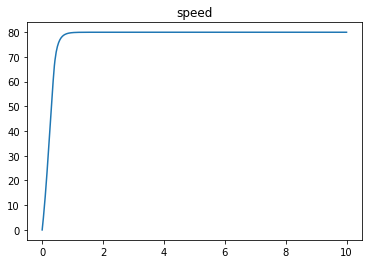

In [74]:
plt.figure()
plt.title('speed')
plt.plot(t,speed)
plt.show()

array([2000])